In [2]:
import os
import pyNastran
print (pyNastran.__file__)
print (pyNastran.__version__)
pkg_path = pyNastran.__path__[0]

from pyNastran.bdf.bdf import BDF
from pyNastran.utils import object_attributes, object_methods

print("pkg_path = %s" % pkg_path)

f:\work\pynastran\pynastran\master3\pyNastran\__init__.pyc
0.8.0+dev.f897603
pkg_path = f:\work\pynastran\pynastran\master3\pyNastran


In [3]:
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))
print(bdf_filename)

# look at the model
!pyNastranGUI -f nastran -i {bdf_filename} > junk.out

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


In [4]:
print(bdf_filename)

# create the BDF object
bdf = BDF()

# read the file from the GUI
# don't cross-reference
#bdf.read_bdf(xref=False)
bdf.read_bdf(bdf_filename, xref=False)

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
DEBUG:     fname=bdf.pyc                   lineNo=744    ---starting BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---
DEBUG:     fname=bdf.pyc                   lineNo=2654   opening 'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'
DEBUG:     fname=bdf.pyc                   lineNo=770    ---finished BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---


In [5]:
#bdf_filename = r'D:\work\pynastran_0.8.0_py27\models\iSat\ISat_Launch_Sm_Rgd.dat'
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))

# read the file as a path
bdf_xref = BDF()
bdf_xref.read_bdf(bdf_filename, xref=True)

DEBUG:     fname=bdf.pyc                   lineNo=744    ---starting BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---
DEBUG:     fname=bdf.pyc                   lineNo=2654   opening 'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'
DEBUG:     fname=cross_reference.pyc       lineNo=527    Cross Referencing...
DEBUG:     fname=bdf.pyc                   lineNo=770    ---finished BDF.read_bdf of f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat---


In [17]:
print("attributes = [%s]\n" % ', '.join(bdf.object_attributes()))
print("methods = [%s]\n" % ', '.join(bdf.object_methods()))
print(bdf.get_bdf_stats())
print("card_count = %s\n" % bdf.card_count)
print("reject_count = %s" % bdf.reject_count)

attributes = [MATS1, MATS3, MATS8, MATT1, MATT2, MATT3, MATT4, MATT5, MATT8, MATT9, active_filename, active_filenames, aecomps, aefacts, aelinks, aelists, aeparams, aero, aeros, aestats, aesurfs, asets, bcrparas, bcs, bctadds, bctparas, bctsets, bdf_filename, bsets, bsurf, bsurfs, cMethods, caeros, card_count, cards_to_read, case_control_deck, case_control_lines, convection_properties, coords, creep_materials, csets, csschds, dareas, dconadds, dconstrs, ddvals, debug, delays, dequations, desvars, dlinks, dload_entries, dloads, dmigs, dmijis, dmijs, dmiks, dmis, doptprm, dphases, dresps, dscreen, dtable, dumplines, dvcrels, dvmrels, dvprels, echo, elements, epoints, executive_control_lines, flfacts, flutters, frequencies, gridSet, gusts, hyperelastic_materials, iSolLine, include_dir, is_msc, is_nx, loads, masses, materials, methods, mkaeros, model_type, monitor_points, mpcadds, mpcs, nastran_format, nlparms, nlpcis, nodes, paeros, params, pbusht, pdampt, pelast, phbdys, plotels, points,

In [20]:
# explanation of cross-referencing

# no cross referencing (xref=False)
cquad = bdf.elements[1]
nid1 = cquad.nodes[0]
print("nid1 = %s" % nid1)
n1 = bdf.nodes[nid1]
cd4 = n1.cd
c4 = bdf.coords[cd4]
print("i xref=False %s" % str(c4.i))
#print object_attributes(c4)

# cross referenced (xref=True)
print("i xref=True", bdf_xref.elements[1].nodes[0].cd.i)

# how is it done?
cquad.nodes[0] = n1
print(cquad.nodes[0])

nid1 = $*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4



KeyError: $*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4


In [22]:
# some Grid methods
n1 = bdf_xref.nodes[1]
print(n1)

# the comment
c1 = bdf_xref.nodes[1].comment
c2 = bdf_xref.nodes[2].comment
print("c1=%r" % c1)
print("c2=%r" % c2)


# get the position of a node
# in the local cooordinate system
print("xyz = %s" % n1.xyz)

# in the global frame
print("position = %s" % n1.get_position())

# in an arbitrary frame
print("wrt5 = %s" % n1.get_position_wrt(bdf, 5))
print("wrt4 = %s" % n1.get_position_wrt(bdf, 4))


$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

c1=u'$*\n$*  GRID CARDS\n$*\n'
c2=u''
xyz = [ -4.5  -7.5 -14. ]
position = [ -4.5  -7.5 -14. ]
wrt5 = [  2.12132034  14.         -26.59188309]
wrt4 = [ -4.5  -7.5 -14. ]


In [24]:
n1 = bdf_xref.nodes[1]
n1.xyz[1] = -7.5
print("repr  = %s" % n1.repr_fields())
print("raw   = %s" % n1.repr_fields())

#n1.xyz[1] = 100000000000.
print("repr2 = %s" % n1.repr_fields())
print(n1)
print(n1.write_card(size=8))
print(n1.write_card(size=16, is_double=False))
print(n1.write_card(size=16, is_double=True))

repr  = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
raw   = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
repr2 = [u'GRID', 1, 4, -4.5, -7.5, -14.0, 4, u'', None]
$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4                

$*
$*  GRID CARDS
$*
GRID*                  1               4            -4.5            -7.5
*                   -14.               4                                

$*
$*  GRID CARDS
$*
GRID*                  1               4-4.500000000D+00-7.500000000D+00
*       -1.400000000D+01               4                                



In [27]:
mass, cg, I = bdf.mass_properties()
print("mass = %s" % mass)

mass = 0.0


In [32]:
eid100 = bdf_xref.elements[100]
print(eid100)
print("nodes = %s" % eid100.nodes)
print("--node0--\n%s" % eid100.nodes[0])
print("--cd--\n%s" % eid100.nodes[0].cd)
print("cd.cid = %s" % eid100.nodes[0].cd.cid)

print("area = %s" % eid100.Area())
print("mass = %s" % eid100.Mass())
print("--pid--\n%s" % eid100.pid)
print("pid.pid = %s" % eid100.pid.pid)
print("pid.Pid() = %s" % eid100.Pid())

print(eid100.pid.mid1)
print("type = %s" % eid100.pid.mid1.type)
print("nu12 = %s" % eid100.pid.mid1.nu12)
print("mass = %s" % eid100.Mass())

CQUAD4       100       1     149     152     161     160

nodes = [GRID         149       4      3.     7.5   -16.5       4
, GRID         152       4     1.5     7.5   -16.5       4
, GRID         161       4     1.5     7.5    -14.       4
, GRID         160       4      3.     7.5    -14.       4
]
--node0--
GRID         149       4      3.     7.5   -16.5       4

--cd--
CORD2R         4              0.      0.      0.      0.      0.      1.
              1.      0.      0.

cd.cid = 4
area = 3.75
mass = 3.6428803074e-05
--pid--
$*
$*  PROPERTY CARDS
$*
$*
$*  I-DEAS property: 1  name: BUS PNL HCMB 2PLY
PSHELL         1       6    .036       61415.815       7  22.234 3.551-6
              .4     -.4

pid.pid = 1
pid.Pid() = 1
$*
$*  I-DEAS Material: 6  name: BUS_CFRP_PW_ORTHO
$* M46J PW ETW
MAT8           6   1.7+7   1.7+7     .98 340000. 180000. 180000..0001712
                           71.33

type = MAT8
nu12 = 0.98
mass = 3.6428803074e-05


In [33]:
import getpass
name = getpass.getuser()
os.chdir(os.path.join(r'C:\Users', name, 'Desktop'))

In [34]:
pwd

u'C:\\Users\\Steve\\Desktop'

In [35]:
# write the bdf
# interspersed writes the property of the elemenent set before the elements; takes longer
bdf_xref.write_bdf('fem.bdf', interspersed=False, size=8, is_double=False)
!tail -n 5 "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=False)
!tail "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=True)
!tail "fem.bdf"



CORD2R        75        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
CORD2R        76        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
ENDDATA
*
CORD2R*               75                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
CORD2R*               76                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
ENDDATA
*
CORD2R*               75                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*       4.0000000000D+01-2.185478395D-15-4.000000000D+01
*
CORD2R*               76                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*      

In [36]:
bdf_filename

'f:\\work\\pynastran\\pynastran\\master3\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'

In [37]:
print(bdf_filename)
%echo {bdf_filename}
#!pyNastranGUI -f nastran -i {bdf_filename}

solid_bending_bdf = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.bdf'))
solid_bending_op2 = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.op2'))

!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2}  > junk.out
print("done")

f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
f:\work\pynastran\pynastran\master3\models\iSat\ISat_Launch_Sm_Rgd.dat
done


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


/cygdrive/c/Users/Steve/Desktop


QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread
QObject::startTimer: QTimer can only be used with threads started with QThread


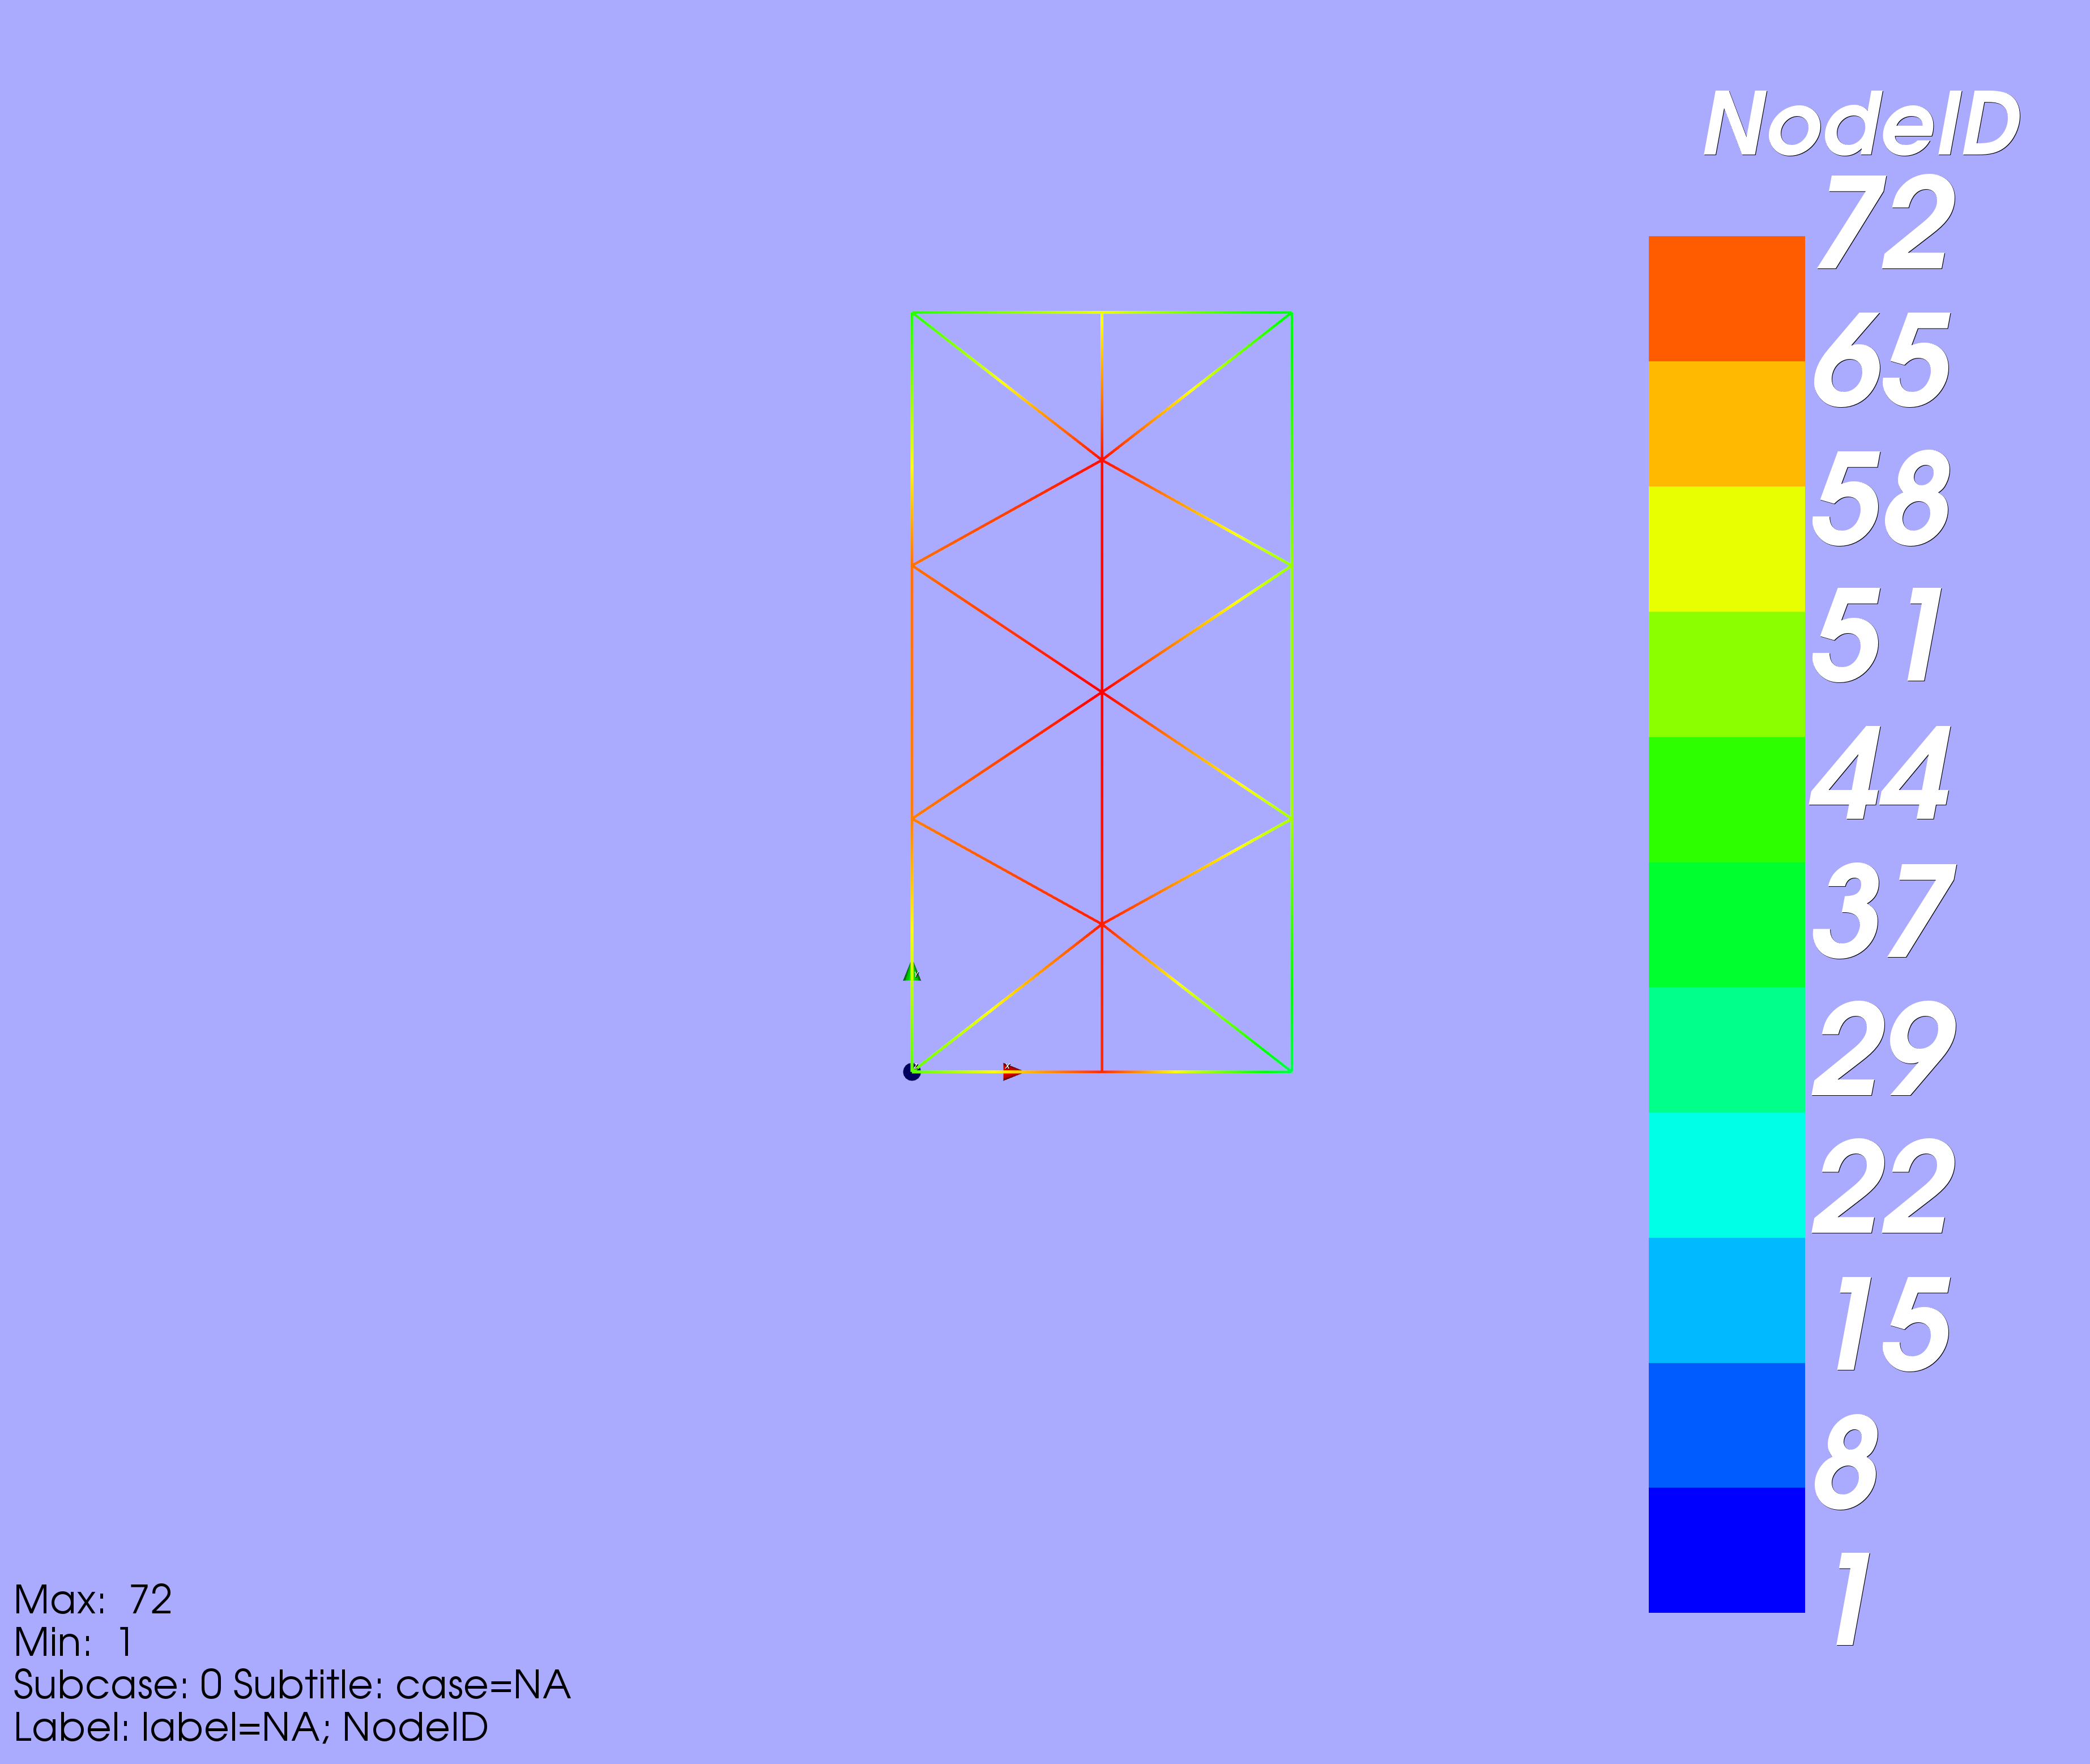

the picture is visible


In [38]:
with open('script.py', 'wb') as f:
    f.write('self.on_wireframe()\n')
    picture_filename = os.path.join(os.getcwd(), 'wireframe_solid_bending.png')
    f.write("self.on_take_screenshot(%r)\n" % picture_filename)
    f.write('sys.exit()')

!pwd
!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2} --postscript script.py > junk.out

# display in a popup
!wireframe_solid_bending.png

from IPython.display import Image
from IPython.display import display
assert os.path.exists('wireframe_solid_bending.png')

# display in iPython
i = Image(filename='wireframe_solid_bending.png')
display(i)
print("the picture is visible")